<a href="https://colab.research.google.com/github/rsskga/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [0]:
# !pip install pandas==0.23.4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist
import warnings

In [0]:
data_url = 'https://raw.githubusercontent.com/rsskga/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv'
df = pd.read_csv(data_url, usecols=['age', 'weight', 'exercise_time'])
df.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [0]:
df.dtypes

age                 int64
weight              int64
exercise_time       int64
age_binned       category
dtype: object

In [0]:
# ages = ["young adult", "adult", "middle age", "boomer", "elderly", "outlier"]
# age_bins = [0, 30, 42, 54, 66, 78, 90]
# df['age_binned'] = pd.cut(df['age'], age_bins, labels=ages)

age_bins = pd.cut(df['age'], 12)
pd.value_counts(age_bins)

(17.938, 23.167]    118
(28.333, 33.5]      112
(33.5, 38.667]      105
(43.833, 49.0]      104
(69.667, 74.833]    103
(54.167, 59.333]    102
(64.5, 69.667]      100
(38.667, 43.833]     96
(74.833, 80.0]       95
(59.333, 64.5]       92
(23.167, 28.333]     91
(49.0, 54.167]       82
Name: age, dtype: int64

In [0]:
weight_bins = pd.cut(df['weight'], 15)
pd.value_counts(weight_bins)

(119.467, 129.2]      142
(109.733, 119.467]    117
(99.854, 109.733]     116
(148.667, 158.4]      112
(138.933, 148.667]    112
(129.2, 138.933]      111
(158.4, 168.133]       94
(177.867, 187.6]       86
(168.133, 177.867]     78
(197.333, 207.067]     70
(207.067, 216.8]       58
(187.6, 197.333]       51
(216.8, 226.533]       24
(226.533, 236.267]     19
(236.267, 246.0]       10
Name: weight, dtype: int64

In [0]:
exercise_bins = pd.cut(df['exercise_time'], 12)
pd.value_counts(exercise_bins)

(75.0, 100.0]     150
(-0.3, 25.0]      128
(50.0, 75.0]      114
(25.0, 50.0]      113
(100.0, 125.0]    106
(150.0, 175.0]    100
(175.0, 200.0]     90
(125.0, 150.0]     88
(225.0, 250.0]     84
(275.0, 300.0]     82
(250.0, 275.0]     74
(200.0, 225.0]     71
Name: exercise_time, dtype: int64

In [0]:
pd.crosstab(age_bins, [weight_bins, exercise_bins])

weight           (99.854, 109.733]       ...        (236.267, 246.0]
exercise_time         (-0.3, 25.0]       ...            (25.0, 50.0]
age                                      ...                        
(17.938, 23.167]                 0       ...                       0
(23.167, 28.333]                 0       ...                       0
(28.333, 33.5]                   0       ...                       0
(33.5, 38.667]                   0       ...                       0
(38.667, 43.833]                 1       ...                       0
(43.833, 49.0]                   1       ...                       0
(49.0, 54.167]                   0       ...                       0
(54.167, 59.333]                 2       ...                       0
(59.333, 64.5]                   1       ...                       0
(64.5, 69.667]                   2       ...                       0
(69.667, 74.833]                 3       ...                       0
(74.833, 80.0]                   0       ...                       1

[12 rows x 131 columns]

In [0]:
pd.crosstab(age_bins, weight_bins)

weight,"(99.854, 109.733]","(109.733, 119.467]","(119.467, 129.2]","(129.2, 138.933]","(138.933, 148.667]","(148.667, 158.4]","(158.4, 168.133]","(168.133, 177.867]","(177.867, 187.6]","(187.6, 197.333]","(197.333, 207.067]","(207.067, 216.8]","(216.8, 226.533]","(226.533, 236.267]","(236.267, 246.0]"
age,,,,,,,,,,,,,,,
"(17.938, 23.167]",10,14,11,11,13,14,11,7,7,8,9,1,1,0,1
"(23.167, 28.333]",10,14,7,10,13,10,6,4,2,2,1,7,2,3,0
"(28.333, 33.5]",12,16,10,13,8,9,12,10,8,3,2,6,1,2,0
"(33.5, 38.667]",16,12,19,5,8,11,4,5,6,4,8,5,1,1,0
"(38.667, 43.833]",14,9,15,11,9,8,7,2,9,1,6,2,2,0,1
"(43.833, 49.0]",8,8,14,16,9,6,11,10,4,3,5,5,2,0,3
"(49.0, 54.167]",11,9,15,5,9,3,4,7,8,3,3,3,1,1,0
"(54.167, 59.333]",7,11,14,6,13,13,6,5,8,4,8,7,0,0,0
"(59.333, 64.5]",6,5,8,14,8,11,3,9,6,5,7,5,2,3,0


In [0]:
pd.crosstab(age_bins, exercise_bins)

exercise_time,"(-0.3, 25.0]","(25.0, 50.0]","(50.0, 75.0]","(75.0, 100.0]","(100.0, 125.0]","(125.0, 150.0]","(150.0, 175.0]","(175.0, 200.0]","(200.0, 225.0]","(225.0, 250.0]","(250.0, 275.0]","(275.0, 300.0]"
age,,,,,,,,,,,,
"(17.938, 23.167]",5,10,11,11,17,7,15,11,10,12,5,4
"(23.167, 28.333]",5,9,6,7,2,7,10,9,8,9,10,9
"(28.333, 33.5]",11,15,6,5,8,9,9,10,7,16,5,11
"(33.5, 38.667]",10,12,6,15,8,4,10,13,6,5,7,9
"(38.667, 43.833]",9,6,5,13,7,5,6,4,9,10,13,9
"(43.833, 49.0]",9,3,10,12,7,6,9,7,7,10,13,11
"(49.0, 54.167]",6,5,7,5,5,10,6,7,2,4,10,15
"(54.167, 59.333]",9,6,7,11,9,5,9,7,11,7,9,12
"(59.333, 64.5]",10,8,11,13,9,6,6,11,5,9,2,2


(array([1200.]), array([18., 80.]), <a list of 1 Patch objects>)

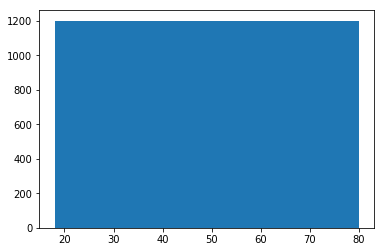

In [0]:
warnings.simplefilter('ignore')  # Ignore bayesian block p0 warning
hist(df['age'], bins="blocks")

(array([118.,  91., 112., 105.,  96.,  82., 104., 102.,  92., 100., 103.,
         95.]),
 array([18.        , 23.16666667, 28.33333333, 33.5       , 38.66666667,
        43.83333333, 49.        , 54.16666667, 59.33333333, 64.5       ,
        69.66666667, 74.83333333, 80.        ]),
 <a list of 12 Patch objects>)

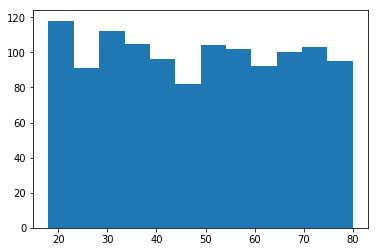

In [0]:
plt.hist(df['age'], bins='auto')

(array([118., 117., 115., 119.,  97.,  96., 111., 106.,  95., 131.,  95.]),
 array([18.        , 23.63636364, 29.27272727, 34.90909091, 40.54545455,
        46.18181818, 51.81818182, 57.45454545, 63.09090909, 68.72727273,
        74.36363636, 80.        ]),
 <a list of 11 Patch objects>)

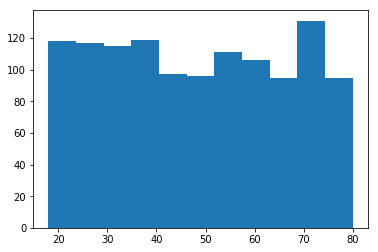

In [0]:
plt.hist(df['age'], bins='fd')

(array([118.,  91., 112., 105.,  96.,  82., 104., 102.,  92., 100., 103.,
         95.]),
 array([18.        , 23.16666667, 28.33333333, 33.5       , 38.66666667,
        43.83333333, 49.        , 54.16666667, 59.33333333, 64.5       ,
        69.66666667, 74.83333333, 80.        ]),
 <a list of 12 Patch objects>)

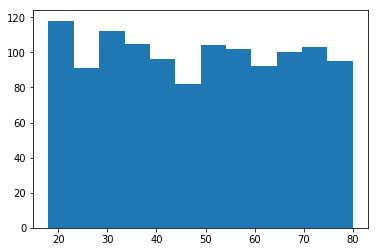

In [0]:
plt.hist(df['age'], bins='doane')

(array([118., 117., 115., 119.,  97.,  96., 111., 106.,  95., 131.,  95.]),
 array([18.        , 23.63636364, 29.27272727, 34.90909091, 40.54545455,
        46.18181818, 51.81818182, 57.45454545, 63.09090909, 68.72727273,
        74.36363636, 80.        ]),
 <a list of 11 Patch objects>)

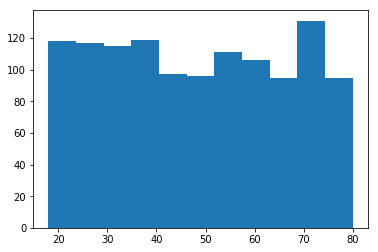

In [0]:
plt.hist(df['age'], bins='scott')

(array([60., 58., 51., 66., 60., 55., 51., 68., 53., 44., 38., 58., 46.,
        65., 50., 56., 38., 57., 74., 57., 47., 48.]),
 array([18.        , 20.81818182, 23.63636364, 26.45454545, 29.27272727,
        32.09090909, 34.90909091, 37.72727273, 40.54545455, 43.36363636,
        46.18181818, 49.        , 51.81818182, 54.63636364, 57.45454545,
        60.27272727, 63.09090909, 65.90909091, 68.72727273, 71.54545455,
        74.36363636, 77.18181818, 80.        ]),
 <a list of 22 Patch objects>)

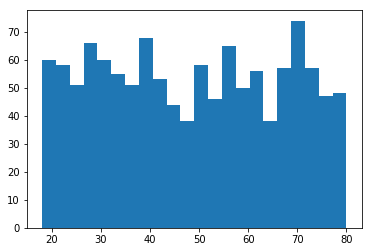

In [0]:
plt.hist(df['age'], bins='rice')

(array([118.,  91., 112., 105.,  96.,  82., 104., 102.,  92., 100., 103.,
         95.]),
 array([18.        , 23.16666667, 28.33333333, 33.5       , 38.66666667,
        43.83333333, 49.        , 54.16666667, 59.33333333, 64.5       ,
        69.66666667, 74.83333333, 80.        ]),
 <a list of 12 Patch objects>)

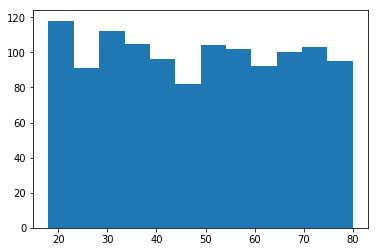

In [0]:
plt.hist(df['age'], bins='sturges')

(array([43., 35., 40., 36., 15., 40., 47., 39., 26., 50., 30., 46., 54.,
         8., 34., 23., 38., 22., 36., 32., 38., 17., 39., 35., 37., 42.,
        15., 37., 48., 46., 18., 39., 34., 27., 34.]),
 array([18.        , 19.77142857, 21.54285714, 23.31428571, 25.08571429,
        26.85714286, 28.62857143, 30.4       , 32.17142857, 33.94285714,
        35.71428571, 37.48571429, 39.25714286, 41.02857143, 42.8       ,
        44.57142857, 46.34285714, 48.11428571, 49.88571429, 51.65714286,
        53.42857143, 55.2       , 56.97142857, 58.74285714, 60.51428571,
        62.28571429, 64.05714286, 65.82857143, 67.6       , 69.37142857,
        71.14285714, 72.91428571, 74.68571429, 76.45714286, 78.22857143,
        80.        ]),
 <a list of 35 Patch objects>)

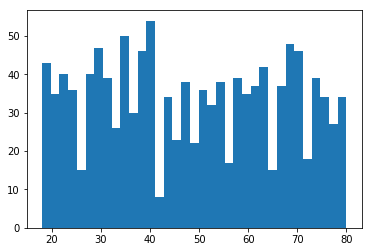

In [0]:
plt.hist(df['age'], bins='sqrt')

(array([744., 234., 178.,  44.]),
 array([100. , 161.5, 188.5, 218.5, 246. ]),
 <a list of 4 Patch objects>)

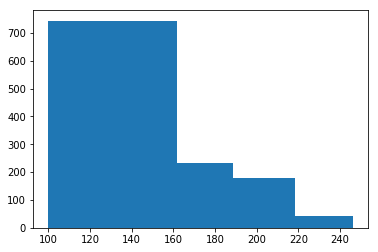

In [0]:
warnings.simplefilter('ignore')  # Ignore bayesian block p0 warning
hist(df['weight'], bins="blocks")

(array([116., 117., 142., 111., 112., 112.,  94.,  78.,  86.,  51.,  70.,
         58.,  24.,  19.,  10.]),
 array([100.        , 109.73333333, 119.46666667, 129.2       ,
        138.93333333, 148.66666667, 158.4       , 168.13333333,
        177.86666667, 187.6       , 197.33333333, 207.06666667,
        216.8       , 226.53333333, 236.26666667, 246.        ]),
 <a list of 15 Patch objects>)

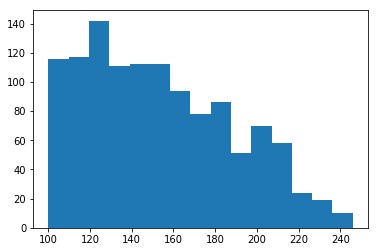

In [0]:
plt.hist(df['weight'], bins='auto')

(array([116., 117., 142., 111., 112., 112.,  94.,  78.,  86.,  51.,  70.,
         58.,  24.,  19.,  10.]),
 array([100.        , 109.73333333, 119.46666667, 129.2       ,
        138.93333333, 148.66666667, 158.4       , 168.13333333,
        177.86666667, 187.6       , 197.33333333, 207.06666667,
        216.8       , 226.53333333, 236.26666667, 246.        ]),
 <a list of 15 Patch objects>)

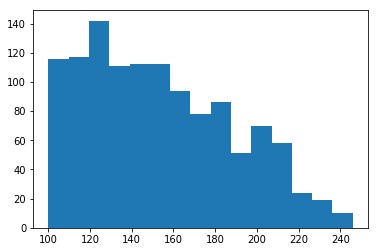

In [0]:
plt.hist(df['weight'], bins='fd')

(array([116., 117., 142., 111., 112., 112.,  94.,  78.,  86.,  51.,  70.,
         58.,  24.,  19.,  10.]),
 array([100.        , 109.73333333, 119.46666667, 129.2       ,
        138.93333333, 148.66666667, 158.4       , 168.13333333,
        177.86666667, 187.6       , 197.33333333, 207.06666667,
        216.8       , 226.53333333, 236.26666667, 246.        ]),
 <a list of 15 Patch objects>)

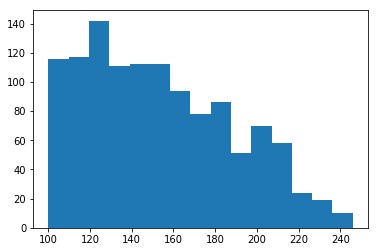

In [0]:
plt.hist(df['weight'], bins='doane')

(array([140., 128., 147., 141., 134., 103.,  94.,  95.,  71.,  70.,  42.,
         22.,  13.]),
 array([100.        , 111.23076923, 122.46153846, 133.69230769,
        144.92307692, 156.15384615, 167.38461538, 178.61538462,
        189.84615385, 201.07692308, 212.30769231, 223.53846154,
        234.76923077, 246.        ]),
 <a list of 13 Patch objects>)

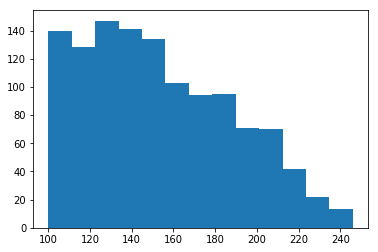

In [0]:
plt.hist(df['weight'], bins='scott')

(array([73., 95., 65., 96., 86., 84., 76., 77., 67., 71., 52., 48., 71.,
        35., 47., 44., 36., 36., 12., 13., 10.,  6.]),
 array([100.        , 106.63636364, 113.27272727, 119.90909091,
        126.54545455, 133.18181818, 139.81818182, 146.45454545,
        153.09090909, 159.72727273, 166.36363636, 173.        ,
        179.63636364, 186.27272727, 192.90909091, 199.54545455,
        206.18181818, 212.81818182, 219.45454545, 226.09090909,
        232.72727273, 239.36363636, 246.        ]),
 <a list of 22 Patch objects>)

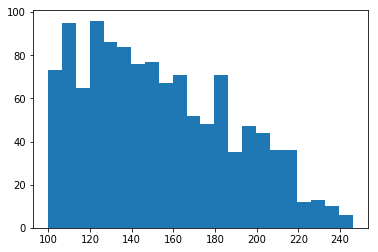

In [0]:
plt.hist(df['weight'], bins='rice')

(array([148., 146., 160., 144., 134., 110., 109.,  68.,  85.,  57.,  24.,
         15.]), array([100.        , 112.16666667, 124.33333333, 136.5       ,
        148.66666667, 160.83333333, 173.        , 185.16666667,
        197.33333333, 209.5       , 221.66666667, 233.83333333,
        246.        ]), <a list of 12 Patch objects>)

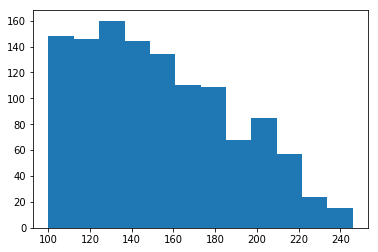

In [0]:
plt.hist(df['weight'], bins='sturges')

(array([55., 48., 45., 54., 44., 66., 63., 40., 58., 54., 38., 55., 47.,
        43., 41., 39., 32., 43., 25., 46., 32., 24., 19., 41., 26., 20.,
        25., 24., 13.,  8., 10.,  7.,  7.,  5.,  3.]),
 array([100.        , 104.17142857, 108.34285714, 112.51428571,
        116.68571429, 120.85714286, 125.02857143, 129.2       ,
        133.37142857, 137.54285714, 141.71428571, 145.88571429,
        150.05714286, 154.22857143, 158.4       , 162.57142857,
        166.74285714, 170.91428571, 175.08571429, 179.25714286,
        183.42857143, 187.6       , 191.77142857, 195.94285714,
        200.11428571, 204.28571429, 208.45714286, 212.62857143,
        216.8       , 220.97142857, 225.14285714, 229.31428571,
        233.48571429, 237.65714286, 241.82857143, 246.        ]),
 <a list of 35 Patch objects>)

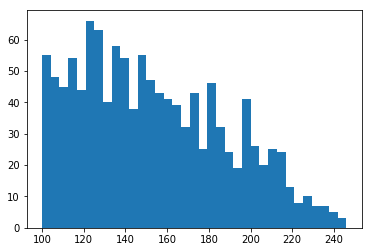

In [0]:
plt.hist(df['weight'], bins='sqrt')

(array([605., 595.]),
 array([  0. , 122.5, 300. ]),
 <a list of 2 Patch objects>)

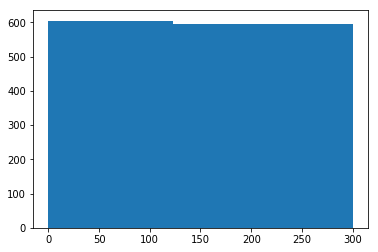

In [0]:
warnings.simplefilter('ignore')  # Ignore bayesian block p0 warning
hist(df['exercise_time'], bins="blocks")

(array([125., 112., 114., 147., 109.,  90.,  97.,  93.,  70.,  85.,  75.,
         83.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.,
        275., 300.]),
 <a list of 12 Patch objects>)

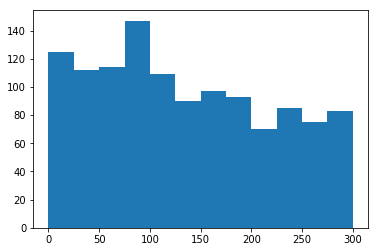

In [0]:
plt.hist(df['exercise_time'], bins='auto')

(array([125., 112., 114., 147., 109.,  90.,  97.,  93.,  70.,  85.,  75.,
         83.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.,
        275., 300.]),
 <a list of 12 Patch objects>)

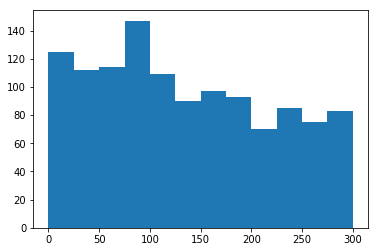

In [0]:
plt.hist(df['exercise_time'], bins='fd')

(array([111.,  97.,  91., 109., 126.,  89.,  74.,  83.,  86.,  57.,  71.,
         69.,  69.,  68.]),
 array([  0.        ,  21.42857143,  42.85714286,  64.28571429,
         85.71428571, 107.14285714, 128.57142857, 150.        ,
        171.42857143, 192.85714286, 214.28571429, 235.71428571,
        257.14285714, 278.57142857, 300.        ]),
 <a list of 14 Patch objects>)

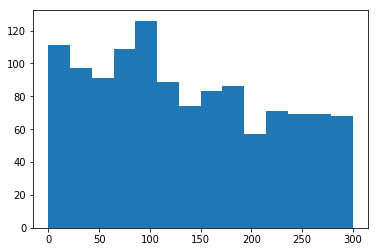

In [0]:
plt.hist(df['exercise_time'], bins='doane')

(array([136., 123., 130., 150., 106., 108., 102.,  81.,  93.,  82.,  89.]),
 array([  0.        ,  27.27272727,  54.54545455,  81.81818182,
        109.09090909, 136.36363636, 163.63636364, 190.90909091,
        218.18181818, 245.45454545, 272.72727273, 300.        ]),
 <a list of 11 Patch objects>)

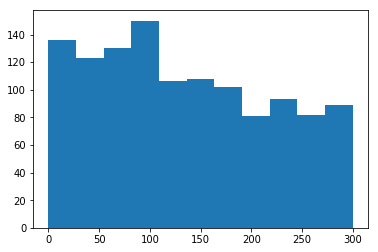

In [0]:
plt.hist(df['exercise_time'], bins='scott')

(array([59., 77., 65., 58., 68., 62., 84., 66., 66., 40., 52., 56., 50.,
        52., 41., 40., 45., 48., 41., 41., 43., 46.]),
 array([  0.        ,  13.63636364,  27.27272727,  40.90909091,
         54.54545455,  68.18181818,  81.81818182,  95.45454545,
        109.09090909, 122.72727273, 136.36363636, 150.        ,
        163.63636364, 177.27272727, 190.90909091, 204.54545455,
        218.18181818, 231.81818182, 245.45454545, 259.09090909,
        272.72727273, 286.36363636, 300.        ]),
 <a list of 22 Patch objects>)

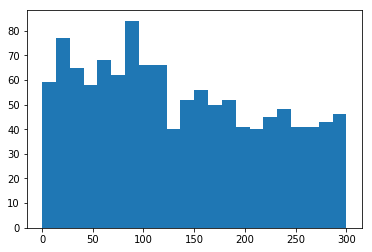

In [0]:
plt.hist(df['exercise_time'], bins='rice')

(array([125., 112., 114., 147., 109.,  90.,  97.,  93.,  70.,  85.,  75.,
         83.]),
 array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225., 250.,
        275., 300.]),
 <a list of 12 Patch objects>)

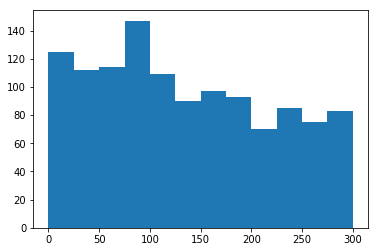

In [0]:
plt.hist(df['exercise_time'], bins='sturges')

(array([41., 42., 45., 44., 36., 38., 31., 50., 35., 46., 63., 43., 38.,
        36., 35., 26., 30., 34., 34., 33., 32., 36., 35., 15., 25., 32.,
        26., 25., 32., 25., 31., 23., 30., 26., 27.]),
 array([  0.        ,   8.57142857,  17.14285714,  25.71428571,
         34.28571429,  42.85714286,  51.42857143,  60.        ,
         68.57142857,  77.14285714,  85.71428571,  94.28571429,
        102.85714286, 111.42857143, 120.        , 128.57142857,
        137.14285714, 145.71428571, 154.28571429, 162.85714286,
        171.42857143, 180.        , 188.57142857, 197.14285714,
        205.71428571, 214.28571429, 222.85714286, 231.42857143,
        240.        , 248.57142857, 257.14285714, 265.71428571,
        274.28571429, 282.85714286, 291.42857143, 300.        ]),
 <a list of 35 Patch objects>)

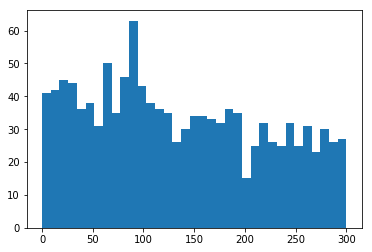

In [0]:
plt.hist(df['exercise_time'], bins='sqrt')

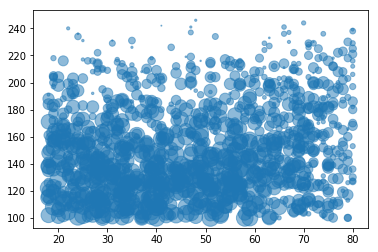

In [0]:
x = df['age']
y = df['weight']
z = df['exercise_time']

# What is the effect of age on weight with exercise time reflected by size?
# Age does not seem to consistently affect weight amongst adults.
plt.scatter(x, y, s=z, alpha=0.5)
plt.show()

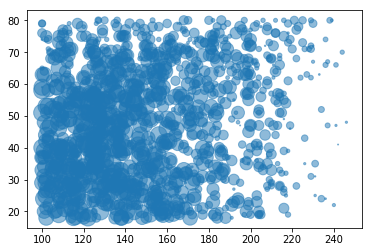

In [0]:
# What is the effect of weight on age with exercise time reflected by size?
# Obviously, age cannot be affected by weight!
plt.scatter(y, x, s=z, alpha=0.5)
plt.show()

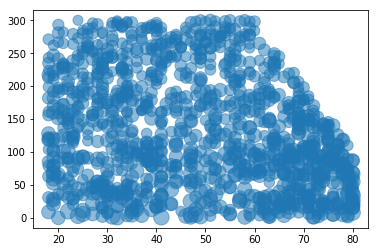

In [0]:
# What is the effect of age on exercise time with weight reflected by size?
# Maybe a slight pattern of reduced exercise at the upper age limit?
plt.scatter(x, z, s=y, alpha=0.5)
plt.show()

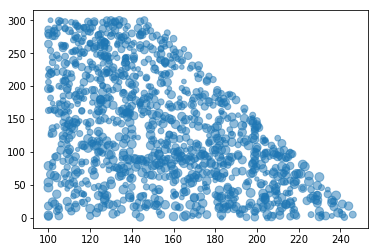

In [0]:
# What is the effect of weight on exercise time with age reflected by size?
# Maybe a pattern of reduced exercise as weight increases beyond the threshold of ~140 pounds?
plt.scatter(y, z, s=x, alpha=0.5)
plt.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data? **Integers**
2.  What are the relationships between the variables? **There may be real relationships with exercise decreasing as age/weight increase beyond specific thresholds, but I'm not very confident in my ability to interpret this yet.**
3.  Which relationships are "real", and which spurious? **See answer #2.**


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_mldata
import numpy as np 
import matplotlib.pyplot as plt